In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_path = '/pl/active/courses/2024_fall/ATOC_3700/data/'


In [3]:
# Example of SSP scenario dataset (replace with actual data in your case)
ssp_scenarios = {
    'SSP1-1.9': xr.open_dataset(data_path + 'Selected_hist_ssp119_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
    'SSP1-2.6': xr.open_dataset(data_path + 'Selected_hist_ssp126_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
    'SSP2-4.5': xr.open_dataset(data_path + 'Selected_hist_ssp245_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
    'SSP3-7.0': xr.open_dataset(data_path + 'Selected_hist_ssp370_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
    'SSP5-8.5': xr.open_dataset(data_path + 'Selected_hist_ssp585_daily_CMIP6_SIE_SIA.nc')['Arctic_SIE'],
}

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Placeholder for the time difference list
time_diff = []
time_actual= []
time_practical= []
time_diff_ssp119 = []
time_diff_ssp126 =[]
time_diff_ssp245 = []
time_diff_ssp370 = []
time_diff_ssp585 = []

years_data=np.linspace(1980,2100,44165)
# Loop through each SSP scenario
for scenario, data in ssp_scenarios.items():
    # Loop through each ensemble member
    for ensemble in np.arange(0,len(data)):
        
       # print(ensemble)
        
        # Extract the sea ice extent and time (years) from the dataset
        years = years_data  
        sea_ice_extent = data.isel(GCM=ensemble).values 
        
        # Check if sea_ice_extent is in the right shape and format
        sea_ice_extent = np.array(sea_ice_extent)
        #print(len(years))
        #print(len(sea_ice_extent))
        # Ensure time and sea ice extent have matching lengths
        if len(years) != len(sea_ice_extent):
            raise ValueError("Mismatch between years and sea ice extent lengths.")

        # Find the first year when sea ice extent is below 1 million km² (practically ice-free)
        below_1mil = np.where(sea_ice_extent < 1)[0]
        if len(below_1mil) > 0:
            practically_ice_free_year = np.int(years[below_1mil[0]])
            #print(below_1mil[0])
        else:
            continue  # If no year falls below 1 million km², skip this ensemble
        
        # Find the first year when sea ice extent reaches 0 km² (actually ice-free)
        zero_extent = np.where(sea_ice_extent == 0)[0]
        if len(zero_extent) > 0:
            actually_ice_free_year = np.int(years[zero_extent[0]])
        else:
            continue  # If no year reaches 0 km², skip this ensemble
            

        # Calculate the difference in years and add it to the list
        time_diff.append(actually_ice_free_year - practically_ice_free_year)
        time_actual.append(actually_ice_free_year)
        time_practical.append(practically_ice_free_year)
    # Assign the length of time_diff to the appropriate variable based on the scenario
    #num_ssp.append(len(time_diff))


    # Print the length of time_diff for the current scenario
    print(f"Length of time_diff for {scenario}: {len(time_diff)}")




/tmp/ipykernel_3993919/1301147813.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  practically_ice_free_year = np.int(years[below_1mil[0]])


Length of time_diff for SSP1-1.9: 0
Length of time_diff for SSP1-2.6: 0


/tmp/ipykernel_3993919/1301147813.py:45: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  actually_ice_free_year = np.int(years[zero_extent[0]])


Length of time_diff for SSP2-4.5: 67
Length of time_diff for SSP3-7.0: 153
Length of time_diff for SSP5-8.5: 230


In [1]:
#histogram for 1 ssp
#plt.hist(time_diff)
#len(time_diff)

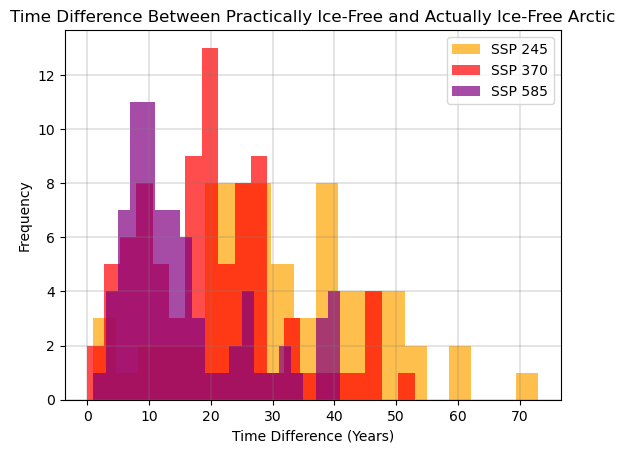

In [20]:
time_diff_ssp119=time_diff[0:0]
time_diff_ssp126=time_diff[0:0]
time_diff_ssp245=time_diff[0:67]
time_diff_ssp370=time_diff[67:153]
time_diff_ssp585=time_diff[153:231]

plt.hist(time_diff_ssp119, bins=20, color = 'green', alpha=0.7)
plt.hist(time_diff_ssp126, bins=20, color = 'yellow', alpha=0.7)
plt.hist(time_diff_ssp245, bins=20, color = 'orange', alpha=0.7, label = "SSP 245")
plt.hist(time_diff_ssp370, bins=20, color = 'red', alpha=0.7, label = "SSP 370")
plt.hist(time_diff_ssp585, bins=20, color = 'purple', alpha=0.7, label = "SSP 585")




plt.title('Time Difference Between Practically Ice-Free and Actually Ice-Free Arctic')
plt.xlabel('Time Difference (Years)')
plt.ylabel('Frequency')
plt.grid(color='gray', linestyle='-', linewidth=0.3)
plt.legend()
plt.show()